<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CIFAR10</a></span></li><li><span><a href="#Save-saliency-maps" data-toc-modified-id="Save-saliency-maps-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Save saliency maps</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li></ul></div>

In [1]:
import torch

import numpy as np 
import sys
sys.path.append('../code')

from dataload import cifar10_load, mnist_load
from saliency.attribution_methods import GradCAM
from saliency.ensembles import *
from utils import get_samples
from visualization import visualize_saliencys

import warnings
warnings.filterwarnings('ignore')

In [2]:
original_images_mnist, original_targets_mnist, pre_images_mnist, mnist_classes, mnist_model = get_samples('mnist',attention='RAN')

Data Complete
filename:  mnist_RAN


In [3]:
original_images_cifar10, original_targets_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_samples('cifar10',attention='RAN')

Files already downloaded and verified
Files already downloaded and verified
Data Complete
filename:  cifar10_RAN


In [4]:
GC_mnist = GradCAM(mnist_model, seq_name='stages')
GC_cifar10 = GradCAM(cifar10_model, seq_name='stages')

# MNIST

In [22]:
# GC
outputs, probs, preds = GC_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=1)

# GC
outputs2, _, _ = GC_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=3)

# GC
outputs3, _, _ = GC_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=5)

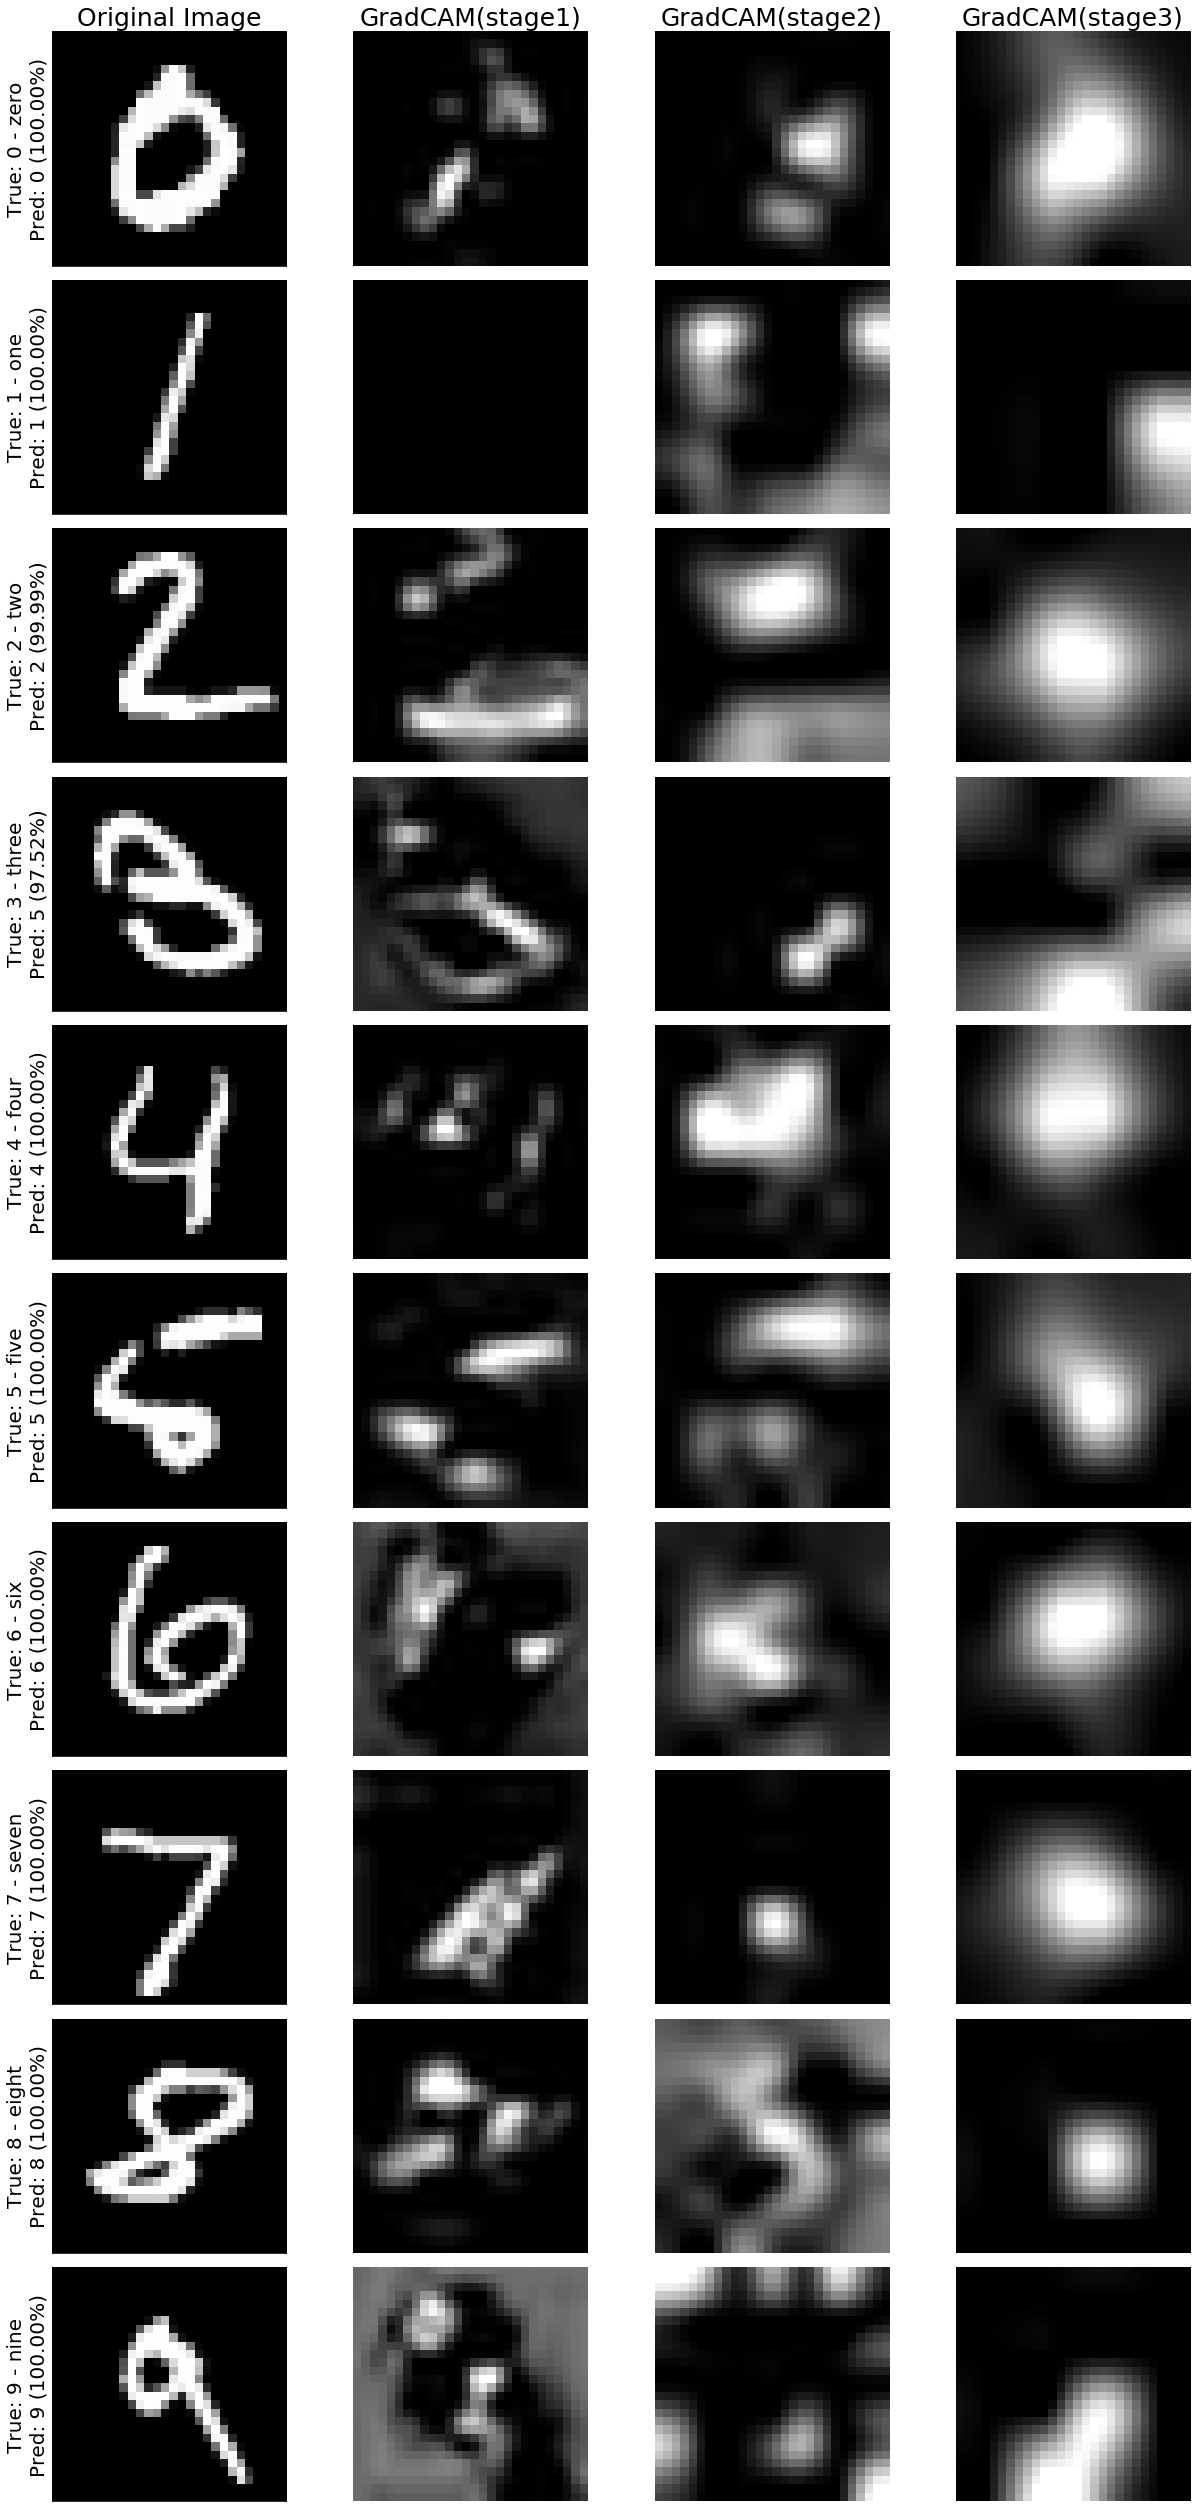

In [23]:
names = ['GradCAM(stage1)','GradCAM(stage2)','GradCAM(stage3)'] # names
results = [outputs, outputs2, outputs3]
target = 'mnist'

visualize_saliencys(original_images_mnist,
                    results,
                    probs,
                    preds,
                    mnist_classes,
                    names,
                    target,
                    col=4, row=10, size=(20,35), labelsize=20, fontsize=25)

In [62]:
27698600 + (15451*100)

29243700

# CIFAR10

In [12]:
# GC
outputs, probs, preds = GC_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=1, color=True)

# GC
outputs2, _, _ = GC_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=3, color=True)

# GC
outputs3, _, _ = GC_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=5, color=True)

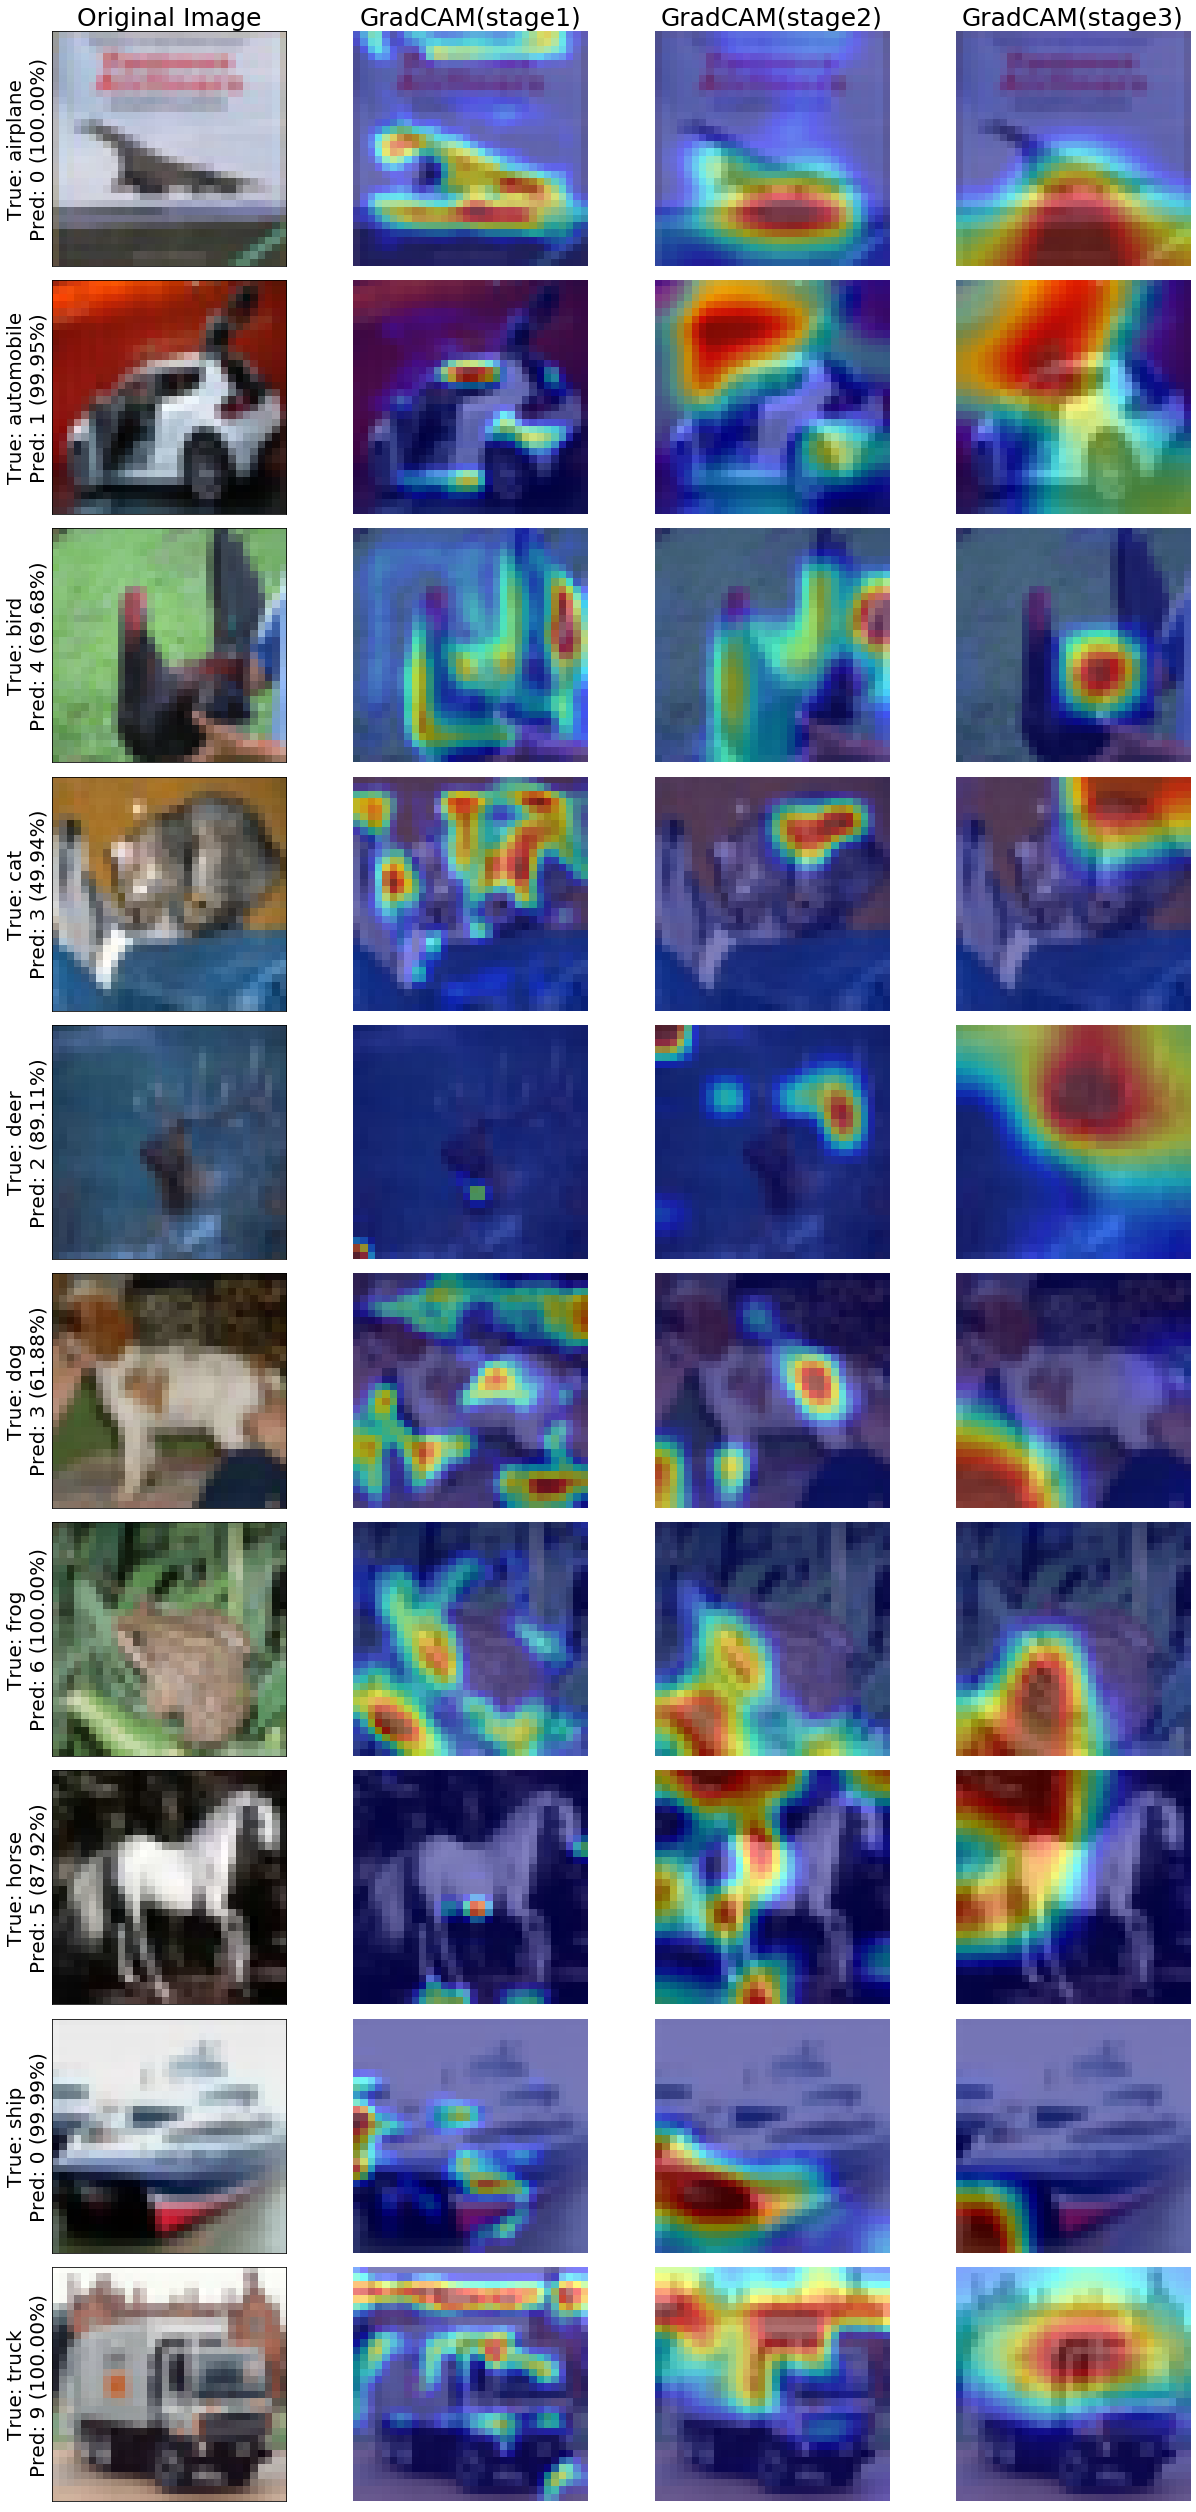

In [14]:
outputs = (outputs * 0.5 + original_images_cifar10 * 0.5).astype(int)
outputs2 = (outputs2 * 0.5 + original_images_cifar10 * 0.5).astype(int)
outputs3 = (outputs3 * 0.5 + original_images_cifar10 * 0.5).astype(int)

names = ['GradCAM(stage1)','GradCAM(stage2)','GradCAM(stage3)'] # names
results = [outputs, outputs2, outputs3]
target = 'cifar10'

visualize_saliencys(original_images_cifar10,
                    results,
                    probs,
                    preds,
                    cifar10_classes,
                    names,
                    target,
                    col=4, row=10, size=(20,35), labelsize=20, fontsize=25)

# Save saliency maps

## MNIST

In [63]:
trainloader, validloader, testloader = mnist_load(shuffle=False)

Data Complete


In [65]:
GC_mnist.save_saliency_map(trainloader, '../saliency_maps/[mnist]GC_RAN_train.hdf5', layer=5)
GC_mnist.save_saliency_map(validloader, '../saliency_maps/[mnist]GC_RAN_valid.hdf5', layer=5)
GC_mnist.save_saliency_map(testloader, '../saliency_maps/[mnist]GC_RAN_test.hdf5', layer=5)

GradCAM:   0%|                                                                                                                                              | 0/94 [00:00<?, ?it/s]

Save saliency maps


GradCAM:   0%|                                                                                                                                              | 0/79 [00:00<?, ?it/s]

Save saliency maps


GradCAM: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [04:57<00:00,  3.77s/it]

Save saliency maps


## CIFAR10

In [66]:
trainloader, validloader, testloader = cifar10_load(shuffle=False, augmentation=False)

Files already downloaded and verified
Files already downloaded and verified
Data Complete


In [67]:
GC_cifar10.save_saliency_map(trainloader, '../saliency_maps/[cifar10]GC_RAN_train.hdf5', color=True, layer=5)
GC_cifar10.save_saliency_map(validloader, '../saliency_maps/[cifar10]GC_RAN_valid.hdf5', color=True, layer=5)
GC_cifar10.save_saliency_map(testloader, '../saliency_maps/[cifar10]GC_RAN_test.hdf5', color=True, layer=5)

GradCAM:   0%|                                                                                                                                              | 0/79 [00:00<?, ?it/s]

Save saliency maps


GradCAM:   0%|                                                                                                                                              | 0/79 [00:00<?, ?it/s]

Save saliency maps


GradCAM: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [05:51<00:00,  4.45s/it]

Save saliency maps
